<a href="https://colab.research.google.com/github/HusamAlzain/ML_Portfolio/blob/main/DL_Assignment_2_(Image_Classification_with_CNN)_Student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import tensorflow as tf

In [ ]:
if tf.config.list_physical_devices("GPU"):
    print("GPU support is enabled for this session.")
else:
    print("CPU will be used for this session.")

GPU support is enabled for this session.


In [ ]:
# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) `tensorflow` random seed
# 3) `python` random seed
SEED = 42
keras.utils.set_random_seed(SEED)

# This will make TensorFlow ops as deterministic as possible, but it will
# affect the overall performance, so it's not enabled by default.
# `enable_op_determinism()` is introduced in TensorFlow 2.9.
tf.config.experimental.enable_op_determinism()

# Recognizing and Understanding Data



In [ ]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
print(f"There are {len(X_train)} images in the training dataset")
print(f"There are {len(X_test)} images in the test dataset")

There are 60000 images in the training dataset
There are 10000 images in the test dataset


In [ ]:
# Checking the shape of one image
X_train[5].shape

(28, 28)

In [ ]:
X_train[5]

array([[  0,   0,   0,   0,   1,   0,   0,   0,   0,  22,  88, 188, 172,
        132, 125, 141, 199, 143,   9,   0,   0,   0,   1,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,  20, 131, 199, 206, 196, 202, 242,
        255, 255, 250, 222, 197, 206, 188, 126,  17,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,  35, 214, 191, 183, 178, 175, 168, 150,
        162, 159, 152, 158, 179, 183, 189, 195, 185,  82,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 170, 190, 172, 177, 176, 171, 169, 162,
        155, 148, 154, 169, 174, 175, 175, 177, 183, 188,  12,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  25, 194, 180, 178, 174, 184, 187, 189, 187,
        184, 181, 189, 200, 197, 193, 190, 178, 175, 194,  90,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  42, 218, 191, 197, 208, 204, 211, 209, 210,
        212, 211, 214, 215, 213, 214, 211, 211, 191, 200, 158,   0,   0,
          0,   0],
       [  

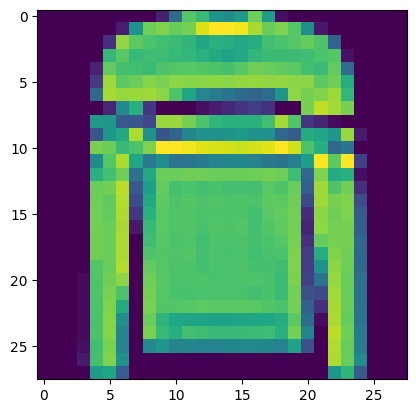

In [ ]:
plt.imshow(X_train[5])
plt.show()

In [ ]:
y_train[5]

2

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

 Useing matplotlib to view an image from the data set. It can be any image from the data set.

In [ ]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

### Plotting some images with their labels

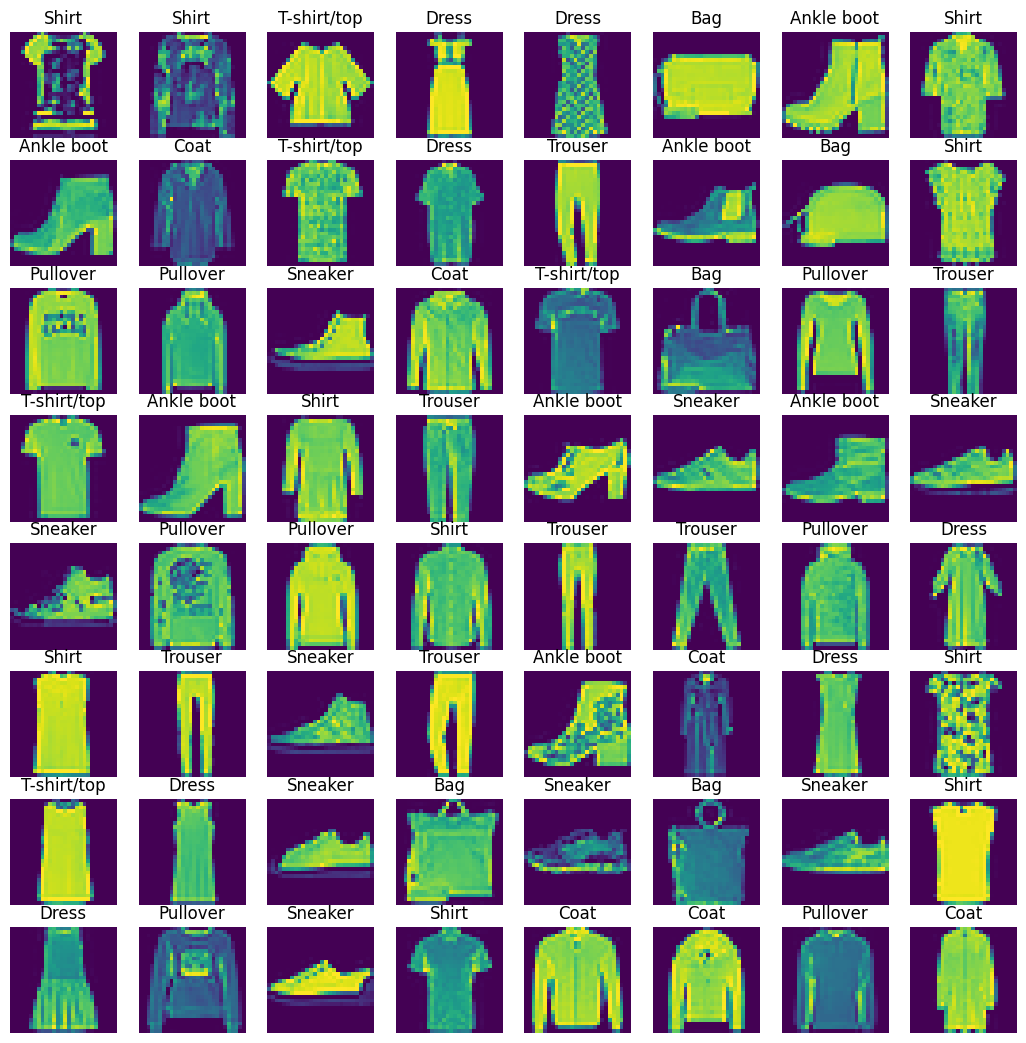

In [ ]:
fig, axes = plt.subplots(8, 8)
fig.set_size_inches(13, 13)
for ax in axes.flatten():
    rand_index = int(np.random.randint(low=0, high=50000, size=1))
    ax.axis("off")
    ax.set_title(classes[int(y_train[rand_index])])
    ax.imshow(X_train[rand_index])
plt.show()

# Data Preprocessing



In [ ]:
X_train[342].min()

0

In [ ]:
X_train[9].max()

255

In [ ]:
# Normalize image pixels
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255
X_test /= 255

In [ ]:
X_train[9].min()

0.0

In [ ]:
X_train[9].max()

1.0

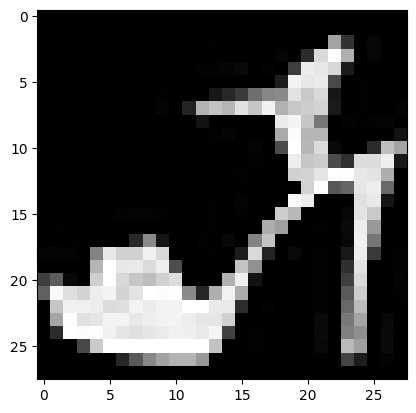

In [ ]:
plt.imshow(X_train[9], cmap="gray")
plt.show()

In [ ]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
np.expand_dims(X_train, 3).shape

(60000, 28, 28, 1)


Reshaping the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.

In [ ]:
X_train = np.expand_dims(X_train, 3)
X_test = np.expand_dims(X_test, 3)
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

**Validation Data**

In [ ]:
from keras.utils import to_categorical

In [ ]:
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)
Y_train.shape

(60000, 10)

In [ ]:
y_train[9]

5

In [ ]:
Y_train[9]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
print("X_train shape -> ", X_train.shape)
print("Y_train shape -> ", Y_train.shape)
print("X_test shape -> ", X_test.shape)
print("Y_test shape -> ", Y_test.shape)

X_train shape ->  (60000, 28, 28, 1)
Y_train shape ->  (60000, 10)
X_test shape ->  (10000, 28, 28, 1)
Y_test shape ->  (10000, 10)


# Modeling

## Create the model


In [ ]:
print("X_train shape -> ", X_train.shape)
print("Y_train shape -> ", Y_train.shape)
print("X_test shape -> ", X_test.shape)
print("Y_test shape -> ", Y_test.shape)

X_train shape ->  (60000, 28, 28, 1)
Y_train shape ->  (60000, 10)
X_test shape ->  (10000, 28, 28, 1)
Y_test shape ->  (10000, 10)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, MaxPooling2D
from keras.regularizers import l2

model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation="relu", kernel_regularizer=l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(10, activation="softmax"))


##  Model Training



In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(
    monitor="val_accuracy", mode="max", patience=13, restore_best_weights=True
)

In [ ]:
model.fit(X_train,
          Y_train,
          batch_size=128,
          epochs=100,
          validation_data=(X_test, Y_test),
          callbacks=[early_stop],
          verbose=1)

Epoch 1/100
469/469 [==============================] - 4s 7ms/step - loss: 0.9526 - accuracy: 0.7529 - val_loss: 0.6284 - val_accuracy: 0.8322
Epoch 2/100
469/469 [==============================] - 3s 6ms/step - loss: 0.6648 - accuracy: 0.8108 - val_loss: 0.7220 - val_accuracy: 0.7972
Epoch 3/100
469/469 [==============================] - 3s 6ms/step - loss: 0.6100 - accuracy: 0.8287 - val_loss: 0.6271 - val_accuracy: 0.8060
Epoch 4/100
469/469 [==============================] - 3s 7ms/step - loss: 0.5782 - accuracy: 0.8384 - val_loss: 0.6321 - val_accuracy: 0.8095
Epoch 5/100
469/469 [==============================] - 3s 6ms/step - loss: 0.5588 - accuracy: 0.8435 - val_loss: 0.5526 - val_accuracy: 0.8386
Epoch 6/100
469/469 [==============================] - 3s 6ms/step - loss: 0.5442 - accuracy: 0.8490 - val_loss: 0.5889 - val_accuracy: 0.8148
Epoch 7/100
469/469 [==============================] - 3s 6ms/step - loss: 0.5292 - accuracy: 0.8532 - val_loss: 0.5489 - val_accuracy: 0.8376

In [ ]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.952598,0.752933,0.628435,0.8322
1,0.664787,0.810767,0.722026,0.7972
2,0.610038,0.828700,0.627104,0.8060
3,0.578237,0.838367,0.632139,0.8095
4,0.558817,0.843450,0.552585,0.8386


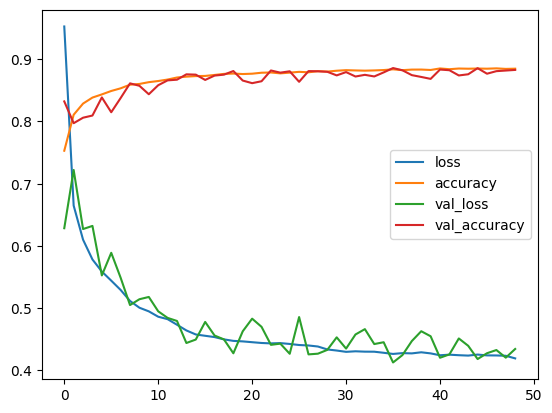

In [ ]:
summary.plot();

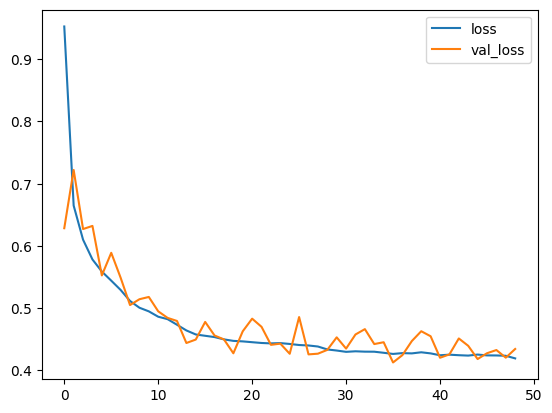

In [ ]:
summary[["loss", "val_loss"]].plot();

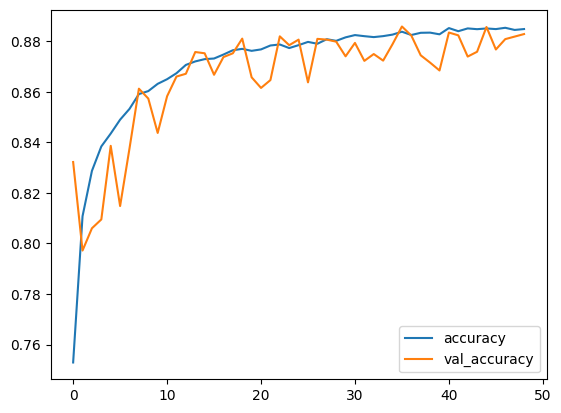

In [ ]:
summary[["accuracy", "val_accuracy"]].plot();

## Model Evaluation


In [ ]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    multilabel_confusion_matrix,
)

In [ ]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4127 - accuracy: 0.8858


[0.4126952588558197, 0.8858000040054321]

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.4126952588558197
Test accuracy: 0.8858000040054321


# Different models

## Model 2

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model2 = Sequential()

model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model2.add(MaxPooling2D((2, 2)))

model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))

model2.add(Flatten())

model2.add(Dropout(0.5))  # Increased dropout for better regularization

model2.add(Dense(64, activation='relu'))


model2.add(Dense(10, activation='softmax'))

model2.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])


In [ ]:
model2.fit(X_train,
          Y_train,
          batch_size=128,
          epochs=100,
          validation_data=(X_test, Y_test),
          callbacks=[early_stop],
          verbose=1)

Epoch 1/100
469/469 [==============================] - 4s 7ms/step - loss: 0.6146 - accuracy: 0.7778 - val_loss: 0.4299 - val_accuracy: 0.8452
Epoch 2/100
469/469 [==============================] - 3s 7ms/step - loss: 0.4130 - accuracy: 0.8503 - val_loss: 0.3629 - val_accuracy: 0.8693
Epoch 3/100
469/469 [==============================] - 3s 5ms/step - loss: 0.3604 - accuracy: 0.8714 - val_loss: 0.3367 - val_accuracy: 0.8774
Epoch 4/100
469/469 [==============================] - 2s 5ms/step - loss: 0.3279 - accuracy: 0.8806 - val_loss: 0.3208 - val_accuracy: 0.8879
Epoch 5/100
469/469 [==============================] - 2s 5ms/step - loss: 0.3086 - accuracy: 0.8883 - val_loss: 0.3139 - val_accuracy: 0.8859
Epoch 6/100
469/469 [==============================] - 3s 6ms/step - loss: 0.2939 - accuracy: 0.8910 - val_loss: 0.3127 - val_accuracy: 0.8869
Epoch 7/100
469/469 [==============================] - 3s 6ms/step - loss: 0.2797 - accuracy: 0.8978 - val_loss: 0.2909 - val_accuracy: 0.8920

In [ ]:
model2.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2320 - accuracy: 0.9193


[0.23203928768634796, 0.9193000197410583]

In [ ]:
score = model2.evaluate(X_test, Y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.23203928768634796
Test accuracy: 0.9193000197410583


## Model 3

In [ ]:
cnn_model = Sequential([
    Conv2D(filters=32,kernel_size=3,activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=2) ,# down sampling the output instead of 28*28 it is 14*14
    Dropout(0.2),
    Flatten(), # flatten out the layers
    Dense(32,activation='relu'),
    Dense(10,activation = 'softmax')

])

# cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
cnn_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])



cnn_model.fit(X_train,
          Y_train,
          batch_size=128,
          epochs=4096,
          validation_data=(X_test, Y_test),
          callbacks=[early_stop],
          verbose=2)

Epoch 1/4096
469/469 - 4s - loss: 0.5205 - accuracy: 0.8199 - val_loss: 0.4273 - val_accuracy: 0.8434 - 4s/epoch - 8ms/step
Epoch 2/4096
469/469 - 2s - loss: 0.3416 - accuracy: 0.8809 - val_loss: 0.3395 - val_accuracy: 0.8765 - 2s/epoch - 4ms/step
Epoch 3/4096
469/469 - 2s - loss: 0.3032 - accuracy: 0.8934 - val_loss: 0.3087 - val_accuracy: 0.8895 - 2s/epoch - 5ms/step
Epoch 4/4096
469/469 - 2s - loss: 0.2810 - accuracy: 0.9009 - val_loss: 0.2916 - val_accuracy: 0.8944 - 2s/epoch - 4ms/step
Epoch 5/4096
469/469 - 2s - loss: 0.2627 - accuracy: 0.9067 - val_loss: 0.2919 - val_accuracy: 0.8954 - 2s/epoch - 4ms/step
Epoch 6/4096
469/469 - 2s - loss: 0.2498 - accuracy: 0.9086 - val_loss: 0.2885 - val_accuracy: 0.8936 - 2s/epoch - 4ms/step
Epoch 7/4096
469/469 - 2s - loss: 0.2374 - accuracy: 0.9139 - val_loss: 0.2724 - val_accuracy: 0.9003 - 2s/epoch - 5ms/step
Epoch 8/4096
469/469 - 2s - loss: 0.2250 - accuracy: 0.9191 - val_loss: 0.2733 - val_accuracy: 0.9045 - 2s/epoch - 4ms/step
Epoch 9/

In [ ]:
cnn_model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2851 - accuracy: 0.9192


[0.28511467576026917, 0.9192000031471252]

In [ ]:
score = cnn_model.evaluate(X_test, Y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.28511467576026917
Test accuracy: 0.9192000031471252


## Prediction

In [192]:
image = X_test[15]
image /= 255.0

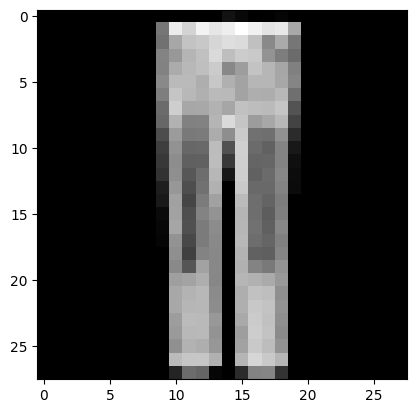

In [193]:
plt.imshow(image, cmap="gray")
plt.show()

In [194]:
np.expand_dims(image, 0).shape

(1, 28, 28, 1)

In [195]:
pred_prob = model2.predict(np.expand_dims(image, 0))
pred_prob

1/1 [==============================] - 0s 26ms/step


array([[0.04651942, 0.02390541, 0.01286201, 0.02171597, 0.01033799,
        0.37974706, 0.02685972, 0.18047127, 0.17525232, 0.12232881]],
      dtype=float32)

In [199]:
# SHAPE --> (num_images, width, height, color_channels)
y_pred = np.argmax(pred_prob)

In [197]:
pred = model.predict(np.expand_dims(image, 0))

1/1 [==============================] - 0s 24ms/step


In [198]:
np.argmax(pred)

7

In [175]:
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___